In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Téléchargement des données du S&P500 avec l'historique maximal disponible
ticker = "^GSPC"
data = yf.download(ticker, period="max", interval="1d")
# Filtrage des données à partir de :
window_frame = "2000-01-01"
end_of_window = "2023-12-31"
data = data[data.index >= window_frame]
data = data[data.index <= end_of_window]
data['TICKER']=ticker

data.reset_index(inplace=True)
data = data.rename(columns={'Date': 'FIRST_OPEN_DATE', 'Open': 'OPEN', 'High': 'HIGH', 'Low': 'LOW', 'Close': 'CLOSE'})

data.tail(25)

[*********************100%***********************]  1 of 1 completed


FIRST_OPEN_DATE         OPEN         HIGH          LOW        CLOSE  \
6012      2023-11-24  4555.839844  4560.310059  4552.799805  4559.339844   
6013      2023-11-27  4554.859863  4560.520020  4546.319824  4550.430176   
6014      2023-11-28  4545.549805  4568.140137  4540.509766  4554.890137   
6015      2023-11-29  4571.839844  4587.640137  4547.149902  4550.580078   
6016      2023-11-30  4554.870117  4569.890137  4537.240234  4567.799805   
6017      2023-12-01  4559.430176  4599.390137  4554.709961  4594.629883   
6018      2023-12-04  4564.370117  4572.370117  4546.720215  4569.779785   
6019      2023-12-05  4557.250000  4578.560059  4551.680176  4567.180176   
6020      2023-12-06  4586.229980  4590.740234  4546.500000  4549.339844   
6021      2023-12-07  4568.839844  4590.919922  4565.220215  4585.589844   
6022      2023-12-08  4576.200195  4609.229980  4574.060059  4604.370117   
6023      2023-12-11  4593.390137  4623.709961  4593.390137  4622.439941   
6024      2023-12-12  4618.299805  4643.930176  4608.089844  4643.700195   
6025      2023-12-13  4646.200195  4709.689941  4643.229980  4707.089844   
6026      2023-12-14  4721.040039  4738.569824  4694.339844  4719.549805   
6027      2023-12-15  4714.229980  4725.529785  4704.689941  4719.189941   
6028      2023-12-18  4725.580078  4749.520020  4725.580078  4740.560059   
6029      2023-12-19  4743.720215  4768.689941  4743.720215  4768.370117   
6030      2023-12-20  4764.729980  4778.009766  4697.819824  4698.350098   
6031      2023-12-21  4724.290039  4748.709961  4708.350098  4746.750000   
6032      2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883   
6033      2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000   
6034      2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078   
6035      2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098   
6036      2023-12-29  4782.879883  4788.430176  4751.990234  4769.830078   

        Adj Close      Volume TICKER  
6012  4559.339844  1639500000  ^GSPC  
6013  4550.430176  3403990000  ^GSPC  
6014  4554.890137  3586240000  ^GSPC  
6015  4550.580078  4418760000  ^GSPC  
6016  4567.799805  5399300000  ^GSPC  
6017  4594.629883  4397120000  ^GSPC  
6018  4569.779785  4369910000  ^GSPC  
6019  4567.180176  3909950000  ^GSPC  
6020  4549.339844  4245680000  ^GSPC  
6021  4585.589844  3818880000  ^GSPC  
6022  4604.370117  3707010000  ^GSPC  
6023  4622.439941  3823210000  ^GSPC  
6024  4643.700195  3808380000  ^GSPC  
6025  4707.089844  5063650000  ^GSPC  
6026  4719.549805  6314040000  ^GSPC  
6027  4719.189941  8218980000  ^GSPC  
6028  4740.560059  4060340000  ^GSPC  
6029  4768.370117  4026970000  ^GSPC  
6030  4698.350098  4201320000  ^GSPC  
6031  4746.750000  3431180000  ^GSPC  
6032  4754.629883  3046770000  ^GSPC  
6033  4774.750000  2513910000  ^GSPC  
6034  4781.580078  2748450000  ^GSPC  
6035  4783.350098  2698860000  ^GSPC  
6036  4769.830078  3126060000  ^GSPC

In [2]:
import pandas as pd
import numpy as np

# Assurez-vous que les dates de FIRST_OPEN_DATE sont en datetime
data['FIRST_OPEN_DATE'] = pd.to_datetime(data['FIRST_OPEN_DATE'])

# Trier les dates pour faciliter la recherche du prochain jour ouvré
data_sorted = data['FIRST_OPEN_DATE'].sort_values().unique()

# Fonction pour trouver le premier jour ouvré disponible
def find_first_trading_day_for_month(year, month):
    # Créer une date du premier jour du mois
    start_date = pd.Timestamp(f'{year}-{month:02d}-01')
    
    # Trouver les jours ouvrés dans le mois donné
    # Chercher la première date dans data_sorted qui soit dans le mois et après start_date
    relevant_dates = data_sorted[(data_sorted >= start_date) & (data_sorted.month == month)]
    
    # Si aucune date n'est trouvée dans le mois, retourner None
    if relevant_dates.size == 0:
        return None
    
    return relevant_dates[0]

def assign_trading_day(year, month, day):
    try:
        # Créer une date pour le jour actuel (1, 2, ..., 31) du mois
        requested_date = pd.Timestamp(f'{year}-{month:02d}-{day:02d}')
        
        # Vérifier si cette date est un jour ouvré (dans data_sorted)
        if requested_date in data_sorted:
            return requested_date
        else:
            # Si ce n'est pas un jour ouvré, trouver le premier jour ouvré suivant
            next_trading_day = find_first_trading_day_for_month(year, month)
            
            # Trouver la première date ouvrée STRICTEMENT après la date demandée
            relevant_dates = data_sorted[(data_sorted > requested_date) & (data_sorted.month == month)]
            
            if relevant_dates.size == 0:
                # Si aucune date n'est trouvée dans le mois, vérifier le mois suivant
                # Ajouter 1 au mois et gérer le passage à l'année suivante si nécessaire
                next_month = month + 1
                next_year = year
                if next_month > 12:  # Si le mois est supérieur à décembre
                    next_month = 1  # Remettre à janvier
                    next_year += 1  # Incrémenter l'année
                
                return find_first_trading_day_for_month(next_year, next_month)
            return relevant_dates[0]
    except ValueError:
        # Si le jour demandé n'existe pas dans ce mois (ex. 31 février), trouver le premier jour ouvré du mois suivant
        # Ajouter 1 au mois et gérer le passage à l'année suivante si nécessaire
        next_month = month + 1
        next_year = year
        if next_month > 12:  # Si le mois est supérieur à décembre
            next_month = 1  # Remettre à janvier
            next_year += 1  # Incrémenter l'année
        
        return find_first_trading_day_for_month(next_year, next_month)



# Liste des mois et jours à traiter
months = list(range(1, 13))  # De 1 à 12
days = list(range(1, 32))    # De 1 à 31

# Créer un DataFrame vide pour stocker les résultats
results = []

# Pour chaque mois et chaque jour, assigner la première date ouvrée
for year in range(2010, 2024):  # Exemple pour 2023, mais peut être ajusté pour plusieurs années
    for month in months:
        for day in days:
            # Trouver la date d'ouverture associée à chaque DAY
            matching_date = assign_trading_day(year, month, day)
            
            # Créer une colonne MONTH au format 'yyyy-mm' en concaténant year et month
            month_str = f'{year}-{month:02d}'
            
            results.append({'CHOSEN_DAY': day, 'FIRST_OPEN_DATE': matching_date, 'MONTH': month_str})

# Créer le DataFrame avec les résultats
result_df = pd.DataFrame(results)

# Afficher les premiers résultats pour vérification
result_df.tail(40)


CHOSEN_DAY FIRST_OPEN_DATE    MONTH
5168          23      2023-11-24  2023-11
5169          24      2023-11-24  2023-11
5170          25      2023-11-27  2023-11
5171          26      2023-11-27  2023-11
5172          27      2023-11-27  2023-11
5173          28      2023-11-28  2023-11
5174          29      2023-11-29  2023-11
5175          30      2023-11-30  2023-11
5176          31      2023-12-01  2023-11
5177           1      2023-12-01  2023-12
5178           2      2023-12-04  2023-12
5179           3      2023-12-04  2023-12
5180           4      2023-12-04  2023-12
5181           5      2023-12-05  2023-12
5182           6      2023-12-06  2023-12
5183           7      2023-12-07  2023-12
5184           8      2023-12-08  2023-12
5185           9      2023-12-11  2023-12
5186          10      2023-12-11  2023-12
5187          11      2023-12-11  2023-12
5188          12      2023-12-12  2023-12
5189          13      2023-12-13  2023-12
5190          14      2023-12-14  2023-12
5191          15      2023-12-15  2023-12
5192          16      2023-12-18  2023-12
5193          17      2023-12-18  2023-12
5194          18      2023-12-18  2023-12
5195          19      2023-12-19  2023-12
5196          20      2023-12-20  2023-12
5197          21      2023-12-21  2023-12
5198          22      2023-12-22  2023-12
5199          23      2023-12-26  2023-12
5200          24      2023-12-26  2023-12
5201          25      2023-12-26  2023-12
5202          26      2023-12-26  2023-12
5203          27      2023-12-27  2023-12
5204          28      2023-12-28  2023-12
5205          29      2023-12-29  2023-12
5206          30             NaT  2023-12
5207          31             NaT  2023-12

In [3]:
normalized_data = pd.merge(result_df, data, on='FIRST_OPEN_DATE')
normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY', 'MONTH'])
normalized_data.tail(40)

CHOSEN_DAY FIRST_OPEN_DATE    MONTH         OPEN         HIGH  \
3967          31      2020-08-31  2020-08  3509.729980  3514.770020   
3998          31      2020-10-01  2020-09  3385.870117  3397.179932   
4029          31      2021-10-01  2020-10  4317.160156  4375.189941   
4060          31      2020-12-01  2020-11  3645.870117  3678.449951   
4091          31      2020-12-31  2020-12  3733.270020  3760.199951   
4122          31      2022-01-03  2021-01  4778.140137  4796.640137   
4153          31      2021-03-01  2021-02  3842.510010  3914.500000   
4184          31      2021-03-31  2021-03  3967.250000  3994.409912   
4215          31      2021-05-03  2021-04  4191.979980  4209.390137   
4246          31      2022-05-02  2021-05  4130.609863  4169.810059   
4277          31      2021-07-01  2021-06  4300.729980  4320.660156   
4308          31      2022-07-01  2021-07  3781.000000  3829.820068   
4339          31      2021-08-31  2021-08  4529.750000  4531.390137   
4370          31      2021-10-01  2021-09  4317.160156  4375.189941   
4401          31      2022-10-03  2021-10  3609.780029  3698.350098   
4432          31      2021-12-01  2021-11  4602.819824  4652.939941   
4463          31      2021-12-31  2021-12  4775.209961  4786.830078   
4494          31      2022-01-31  2022-01  4431.790039  4516.890137   
4525          31      2022-03-01  2022-02  4363.140137  4378.450195   
4556          31      2022-03-31  2022-03  4599.020020  4603.069824   
4587          31      2022-05-02  2022-04  4130.609863  4169.810059   
4618          31      2022-05-31  2022-05  4151.089844  4168.339844   
4649          31      2022-07-01  2022-06  3781.000000  3829.820068   
4680          31      2023-07-03  2022-07  4450.479980  4456.459961   
4711          31      2022-08-31  2022-08  4000.669922  4015.370117   
4742          31      2022-10-03  2022-09  3609.780029  3698.350098   
4773          31      2022-10-31  2022-10  3881.850098  3893.729980   
4804          31      2022-12-01  2022-11  4087.139893  4100.509766   
4835          31      2023-12-01  2022-12  4559.430176  4599.390137   
4866          31      2023-01-31  2023-01  4020.850098  4077.159912   
4897          31      2023-03-01  2023-02  3963.340088  3971.729980   
4928          31      2023-03-31  2023-03  4056.179932  4110.750000   
4959          31      2023-05-01  2023-04  4166.790039  4186.919922   
4990          31      2023-05-31  2023-05  4190.740234  4195.439941   
5021          31      2023-07-03  2023-06  4450.479980  4456.459961   
5052          31      2023-07-31  2023-07  4584.819824  4594.220215   
5083          31      2023-08-31  2023-08  4517.009766  4532.259766   
5114          31      2023-10-02  2023-09  4284.520020  4300.580078   
5145          31      2023-10-31  2023-10  4171.330078  4195.549805   
5176          31      2023-12-01  2023-11  4559.430176  4599.390137   

              LOW        CLOSE    Adj Close      Volume TICKER  
3967  3493.250000  3500.310059  3500.310059  4348280000  ^GSPC  
3998  3361.389893  3380.800049  3380.800049  4076340000  ^GSPC  
4029  4288.520020  4357.040039  4357.040039  4010370000  ^GSPC  
4060  3645.870117  3662.449951  3662.449951  5418480000  ^GSPC  
4091  3726.879883  3756.070068  3756.070068  3179040000  ^GSPC  
4122  4758.169922  4796.560059  4796.560059  3831020000  ^GSPC  
4153  3842.510010  3901.820068  3901.820068  5114820000  ^GSPC  
4184  3966.979980  3972.889893  3972.889893  4578050000  ^GSPC  
4215  4188.029785  4192.660156  4192.660156  4070220000  ^GSPC  
4246  4062.510010  4155.379883  4155.379883  5163790000  ^GSPC  
4277  4300.729980  4319.939941  4319.939941  3788230000  ^GSPC  
4308  3752.100098  3825.330078  3825.330078  4046950000  ^GSPC  
4339  4515.799805  4522.680176  4522.680176  4290710000  ^GSPC  
4370  4288.520020  4357.040039  4357.040039  4010370000  ^GSPC  
4401  3604.929932  3678.429932  3678.429932  4806680000  ^GSPC  
4432  4510.270020  4513.040039  4513.040039  536673000

In [4]:
normalized_data['DAY'] = normalized_data['FIRST_OPEN_DATE'].dt.day
#normalized_data['MONTH'] = normalized_data['FIRST_OPEN_DATE'].dt.to_period('M').astype(str)
normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY','FIRST_OPEN_DATE'])
normalized_data.tail(30)

CHOSEN_DAY FIRST_OPEN_DATE    MONTH         OPEN         HIGH  \
4370          31      2021-10-01  2021-09  4317.160156  4375.189941   
4432          31      2021-12-01  2021-11  4602.819824  4652.939941   
4463          31      2021-12-31  2021-12  4775.209961  4786.830078   
4122          31      2022-01-03  2021-01  4778.140137  4796.640137   
4494          31      2022-01-31  2022-01  4431.790039  4516.890137   
4525          31      2022-03-01  2022-02  4363.140137  4378.450195   
4556          31      2022-03-31  2022-03  4599.020020  4603.069824   
4246          31      2022-05-02  2021-05  4130.609863  4169.810059   
4587          31      2022-05-02  2022-04  4130.609863  4169.810059   
4618          31      2022-05-31  2022-05  4151.089844  4168.339844   
4308          31      2022-07-01  2021-07  3781.000000  3829.820068   
4649          31      2022-07-01  2022-06  3781.000000  3829.820068   
4711          31      2022-08-31  2022-08  4000.669922  4015.370117   
4401          31      2022-10-03  2021-10  3609.780029  3698.350098   
4742          31      2022-10-03  2022-09  3609.780029  3698.350098   
4773          31      2022-10-31  2022-10  3881.850098  3893.729980   
4804          31      2022-12-01  2022-11  4087.139893  4100.509766   
4866          31      2023-01-31  2023-01  4020.850098  4077.159912   
4897          31      2023-03-01  2023-02  3963.340088  3971.729980   
4928          31      2023-03-31  2023-03  4056.179932  4110.750000   
4959          31      2023-05-01  2023-04  4166.790039  4186.919922   
4990          31      2023-05-31  2023-05  4190.740234  4195.439941   
4680          31      2023-07-03  2022-07  4450.479980  4456.459961   
5021          31      2023-07-03  2023-06  4450.479980  4456.459961   
5052          31      2023-07-31  2023-07  4584.819824  4594.220215   
5083          31      2023-08-31  2023-08  4517.009766  4532.259766   
5114          31      2023-10-02  2023-09  4284.520020  4300.580078   
5145          31      2023-10-31  2023-10  4171.330078  4195.549805   
4835          31      2023-12-01  2022-12  4559.430176  4599.390137   
5176          31      2023-12-01  2023-11  4559.430176  4599.390137   

              LOW        CLOSE    Adj Close      Volume TICKER  DAY  
4370  4288.520020  4357.040039  4357.040039  4010370000  ^GSPC    1  
4432  4510.270020  4513.040039  4513.040039  5366730000  ^GSPC    1  
4463  4765.750000  4766.180176  4766.180176  2677820000  ^GSPC   31  
4122  4758.169922  4796.560059  4796.560059  3831020000  ^GSPC    3  
4494  4414.020020  4515.549805  4515.549805  5098610000  ^GSPC   31  
4525  4279.540039  4306.259766  4306.259766  5846230000  ^GSPC    1  
4556  4530.410156  4530.410156  4530.410156  4823020000  ^GSPC   31  
4246  4062.510010  4155.379883  4155.379883  5163790000  ^GSPC    2  
4587  4062.510010  4155.379883  4155.379883  5163790000  ^GSPC    2  
4618  4104.879883  4132.149902  4132.149902  6822640000  ^GSPC   31  
4308  3752.100098  3825.330078  3825.330078  4046950000  ^GSPC    1  
4649  3752.100098  3825.330078  3825.330078  4046950000  ^GSPC    1  
4711  3954.530029  3955.000000  3955.000000  4542490000  ^GSPC   31  
4401  3604.929932  3678.429932  3678.429932  4806680000  ^GSPC    3  
4742  3604.929932  3678.429932  3678.429932  4806680000  ^GSPC    3  
4773  3863.179932  3871.979980  3871.979980  4820620000  ^GSPC   31  
4804  4050.870117  4076.570068  4076.570068  4527130000  ^GSPC    1  
4866  4020.439941  4076.600098  4076.600098  4679320000  ^GSPC   31  
4897  3939.050049  3951.389893  3951.389893  4249480000  ^GSPC    1  
4928  4056.179932  4109.310059  4109.310059  4525120000  ^GSPC   31  
4959  4164.120117  4167.870117  4167.870117  3321370000  ^GSPC    1  
4990  4166.149902  4179.830078  4179.830078  5980670000  ^GSPC   31  
4680  4442.290039  4455.589844  4455.589844  2034280000  ^GSPC    3  
5021  4442.290039  4455.589844  4455.589844  2034280000  ^GSPC    3  
5052  4573.140137  4588.959961  4588.959961  450360000

In [5]:

# Normalisation de chaque mois avec une base 100
normalized_data['BASE_OPEN'] = np.nan
normalized_data['BASE_HIGH'] = np.nan
normalized_data['BASE_LOW'] = np.nan
normalized_data['BASE_CLOSE'] = np.nan

# Itération par mois pour normaliser les données avec une base de 100
for month in normalized_data['MONTH'].unique():
    monthly_data = normalized_data[normalized_data['MONTH'] == month]
    if not monthly_data.empty:
        # Récupérer la valeur d'ouverture du premier jour ouvré du mois
        base_open = monthly_data.iloc[0]['OPEN']
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_OPEN'] = 100 * (monthly_data['OPEN'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_HIGH'] = 100 * (monthly_data['HIGH'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_LOW'] = 100 * (monthly_data['LOW'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_CLOSE'] = 100 * (monthly_data['CLOSE'] / base_open)

normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY', 'MONTH'])
normalized_data.tail(50)

CHOSEN_DAY FIRST_OPEN_DATE    MONTH         OPEN         HIGH  \
3657          31      2019-10-31  2019-10  3046.899902  3046.899902   
3688          31      2019-12-02  2019-11  3143.850098  3144.310059   
3719          31      2019-12-31  2019-12  3215.179932  3231.719971   
3750          31      2020-01-31  2020-01  3282.330078  3282.330078   
3781          31      2020-03-02  2020-02  2974.280029  3090.959961   
3812          31      2020-03-31  2020-03  2614.689941  2641.389893   
3843          31      2020-05-01  2020-04  2869.090088  2869.090088   
3874          31      2021-05-03  2020-05  4191.979980  4209.390137   
3905          31      2020-07-01  2020-06  3105.919922  3128.439941   
3936          31      2020-07-31  2020-07  3270.449951  3272.169922   
3967          31      2020-08-31  2020-08  3509.729980  3514.770020   
3998          31      2020-10-01  2020-09  3385.870117  3397.179932   
4029          31      2021-10-01  2020-10  4317.160156  4375.189941   
4060          31      2020-12-01  2020-11  3645.870117  3678.449951   
4091          31      2020-12-31  2020-12  3733.270020  3760.199951   
4122          31      2022-01-03  2021-01  4778.140137  4796.640137   
4153          31      2021-03-01  2021-02  3842.510010  3914.500000   
4184          31      2021-03-31  2021-03  3967.250000  3994.409912   
4215          31      2021-05-03  2021-04  4191.979980  4209.390137   
4246          31      2022-05-02  2021-05  4130.609863  4169.810059   
4277          31      2021-07-01  2021-06  4300.729980  4320.660156   
4308          31      2022-07-01  2021-07  3781.000000  3829.820068   
4339          31      2021-08-31  2021-08  4529.750000  4531.390137   
4370          31      2021-10-01  2021-09  4317.160156  4375.189941   
4401          31      2022-10-03  2021-10  3609.780029  3698.350098   
4432          31      2021-12-01  2021-11  4602.819824  4652.939941   
4463          31      2021-12-31  2021-12  4775.209961  4786.830078   
4494          31      2022-01-31  2022-01  4431.790039  4516.890137   
4525          31      2022-03-01  2022-02  4363.140137  4378.450195   
4556          31      2022-03-31  2022-03  4599.020020  4603.069824   
4587          31      2022-05-02  2022-04  4130.609863  4169.810059   
4618          31      2022-05-31  2022-05  4151.089844  4168.339844   
4649          31      2022-07-01  2022-06  3781.000000  3829.820068   
4680          31      2023-07-03  2022-07  4450.479980  4456.459961   
4711          31      2022-08-31  2022-08  4000.669922  4015.370117   
4742          31      2022-10-03  2022-09  3609.780029  3698.350098   
4773          31      2022-10-31  2022-10  3881.850098  3893.729980   
4804          31      2022-12-01  2022-11  4087.139893  4100.509766   
4835          31      2023-12-01  2022-12  4559.430176  4599.390137   
4866          31      2023-01-31  2023-01  4020.850098  4077.159912   
4897          31      2023-03-01  2023-02  3963.340088  3971.729980   
4928          31      2023-03-31  2023-03  4056.179932  4110.750000   
4959          31      2023-05-01  2023-04  4166.790039  4186.919922   
4990          31      2023-05-31  2023-05  4190.740234  4195.439941   
5021          31      2023-07-03  2023-06  4450.479980  4456.459961   
5052          31      2023-07-31  2023-07  4584.819824  4594.220215   
5083          31      2023-08-31  2023-08  4517.009766  4532.259766   
5114          31      2023-10-02  2023-09  4284.520020  4300.580078   
5145          31      2023-10-31  2023-10  4171.330078  4195.549805   
5176          31      2023-12-01  2023-11  4559.430176  4599.390137   

              LOW        CLOSE    Adj Close      Volume TICKER  DAY  \
3657  3023.189941  3037.560059  3037.560059  4149310000  ^GSPC   31   
3688  3110.780029  3113.870117  3113.870117  3285750000  ^GSPC    2   
3719  3212.030029  3230.780029  3230.780029  2894760000  ^GSPC   31   
3750  3214.679932  3225.520020  3225.520020  4529700000  ^GSPC   31   
3781  2945.189941  3090.22998

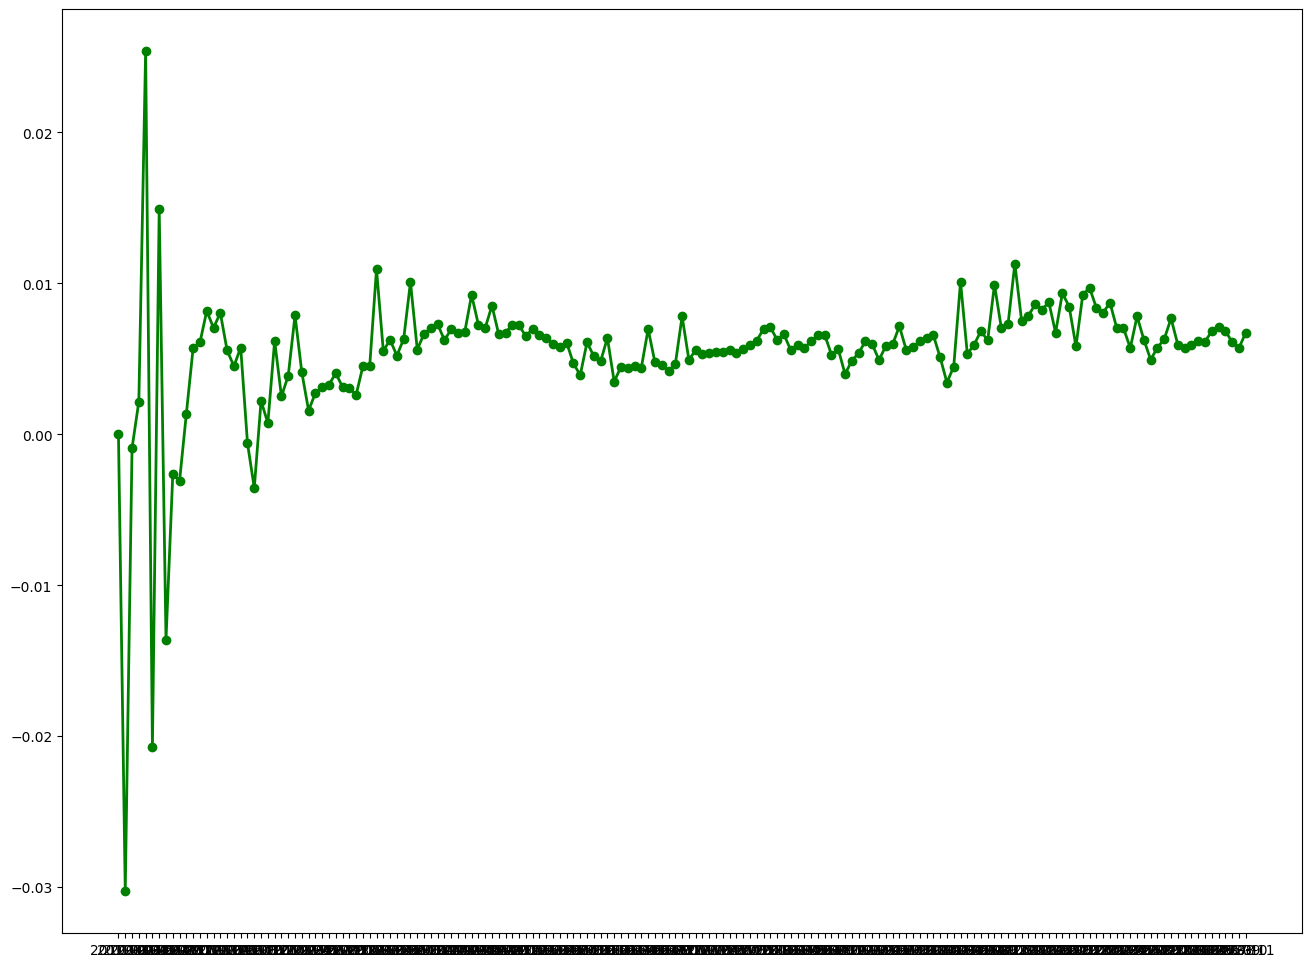

In [6]:
investing_day = 31
dataset = normalized_data.loc[normalized_data['CHOSEN_DAY'] == investing_day, ['TICKER', 'FIRST_OPEN_DATE','OPEN', 'BASE_OPEN', 'CHOSEN_DAY', 'MONTH']]
dataset.reset_index(drop=True, inplace=True)
dataset['OPEN'] = pd.to_numeric(dataset['OPEN'], errors='coerce')
dataset['INVESTED_THIS_DAY']  = 10000
dataset['TOTAL_INVESTED'] = dataset['INVESTED_THIS_DAY'].cumsum()
# Calcul du nombre d'actions achetées
dataset['SHARES_BOUGHT_THIS_DAY'] = dataset['INVESTED_THIS_DAY'] / dataset['OPEN']
dataset['HELD_SHARES'] = dataset['HELD_SHARES'] = dataset['SHARES_BOUGHT_THIS_DAY'].cumsum()
dataset['TOTAL_VALUE'] = dataset['HELD_SHARES'] * dataset['OPEN']
dataset['PERF'] = dataset['TOTAL_VALUE'] / dataset['TOTAL_INVESTED']-1

# Calcul du nombre d'occurrences cumulées pour chaque DAY
dataset['DAY_OCCURRENCE'] = dataset.groupby('CHOSEN_DAY').cumcount() + 1
# Calcul de la performance moyenne par ligne en fonction du nombre d'occurrences cumulées
dataset['AVG_PERF'] = dataset['PERF'] / dataset['DAY_OCCURRENCE']

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
plt.plot(dataset['MONTH'], dataset['AVG_PERF'], marker='o', color='green', linestyle='-', linewidth=2)
#plt.grid(True)
plt.show()


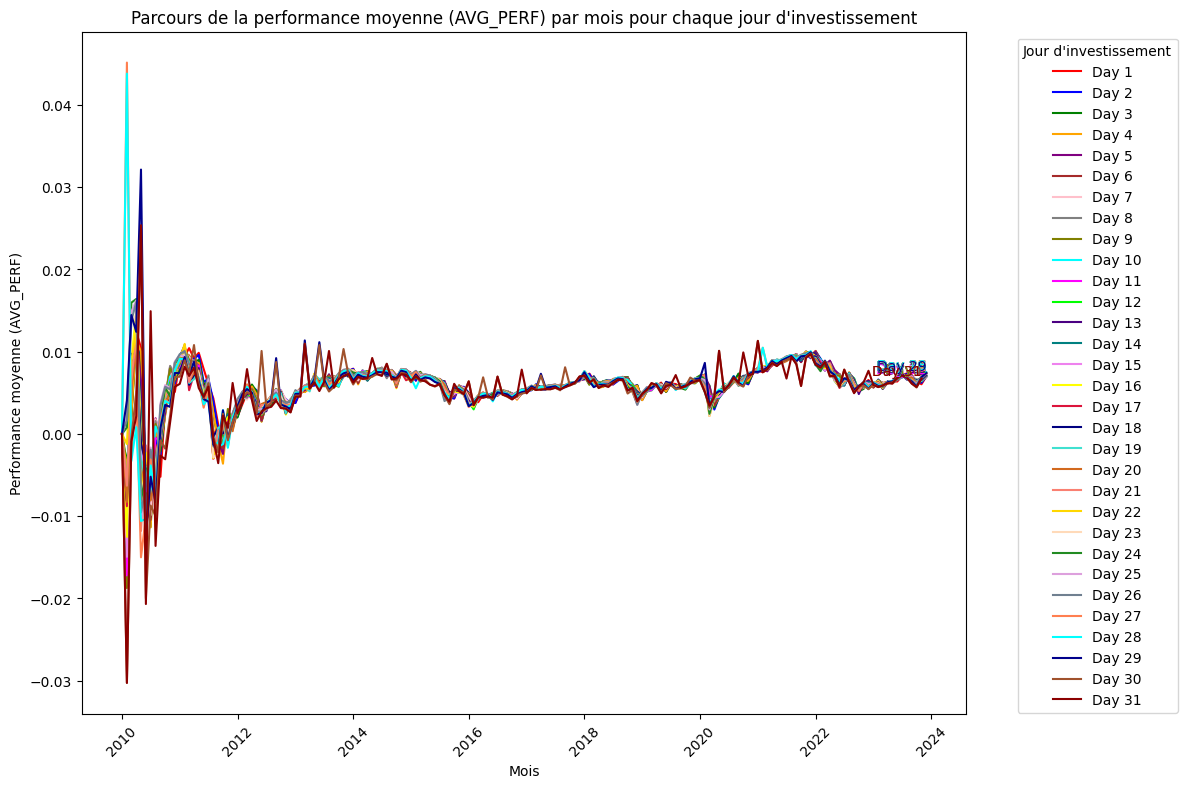

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Liste des jours d'investissement
investing_days = list(range(1, 32))


# Dictionnaire de couleurs fixes pour chaque jour d'investissement
# Dictionnaire de couleurs fixes pour chaque jour d'investissement (avec des couleurs valides)
colors = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'orange', 5: 'purple', 6: 'brown',
    7: 'pink', 8: 'gray', 9: 'olive', 10: 'cyan', 11: 'magenta', 12: '#00FF00',  # lime
    13: 'indigo', 14: 'teal', 15: 'violet', 16: 'yellow', 17: 'crimson', 
    18: 'navy', 19: 'turquoise', 20: 'chocolate', 21: 'salmon', 22: 'gold', 
    23: '#FFDAB9', 24: 'forestgreen', 25: 'plum', 26: 'slategray', 27: 'coral', 
    28: 'aqua', 29: 'darkblue', 30: 'sienna', 31: 'darkred'
}


# Créer un DataFrame vide pour stocker tous les résultats
all_results = []

# Boucle sur chaque jour d'investissement
for investing_day in investing_days:
    # Filtrer les données pour le jour actuel
    dataset = normalized_data.loc[normalized_data['CHOSEN_DAY'] == investing_day, ['FIRST_OPEN_DATE', 'TICKER', 'OPEN', 'BASE_OPEN', 'CHOSEN_DAY', 'MONTH']]
    dataset.reset_index(drop=True, inplace=True)
    
    # Assurez-vous que les prix d'ouverture sont des nombres
    dataset['OPEN'] = pd.to_numeric(dataset['OPEN'], errors='coerce')
    
    # Initialisation des colonnes nécessaires
    dataset['INVESTED_THIS_DAY'] = 10000
    dataset['TOTAL_INVESTED'] = dataset['INVESTED_THIS_DAY'].cumsum()
    
    # Calcul du nombre d'actions achetées
    dataset['SHARES_BOUGHT_THIS_DAY'] = dataset['INVESTED_THIS_DAY'] / dataset['OPEN']
    
    # Nombre total d'actions détenues
    dataset['HELD_SHARES'] = dataset['SHARES_BOUGHT_THIS_DAY'].cumsum()
    
    # Valeur totale de l'investissement
    dataset['TOTAL_VALUE'] = dataset['HELD_SHARES'] * dataset['OPEN']
    
    # Performance par rapport à l'investissement total
    dataset['PERF'] = dataset['TOTAL_VALUE'] / dataset['TOTAL_INVESTED'] - 1
    
    # Calcul du nombre d'occurrences pour chaque jour d'investissement
    dataset['DAY_OCCURRENCE'] = dataset.groupby('CHOSEN_DAY').cumcount() + 1
    
    # Performance moyenne par jour d'investissement
    dataset['AVG_PERF'] = dataset['PERF'] / dataset['DAY_OCCURRENCE']
    
    # Ajouter les résultats du jour à la liste
    all_results.append(dataset)

# Concaténer tous les résultats dans un seul DataFrame
final_dataset = pd.concat(all_results)

# Vérification si la colonne MONTH est déjà sous le bon format datetime
# Si ce n'est pas le cas, convertissez-la.
final_dataset['MONTH'] = pd.to_datetime(final_dataset['MONTH'], format='%Y-%m')

# Trier le DataFrame par mois
final_dataset = final_dataset.sort_values(by='MONTH')

# Tracer le parcours de AVG_PERF pour chaque mois, avec une couleur par DAY
plt.figure(figsize=(12, 8))

# Boucle pour tracer chaque jour d'investissement avec une couleur différente
for investing_day in investing_days:
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]  # Utiliser la couleur fixe
    line, = plt.plot(day_data['MONTH'], day_data['AVG_PERF'], label=f'Day {investing_day}', color=color)
    
    # Ajouter un label à la fin de chaque série
    plt.text(day_data['MONTH'].iloc[-1], day_data['AVG_PERF'].iloc[-1], f'Day {investing_day}', 
             color=color, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Ajouter des détails pour le graphique
plt.title('Parcours de la performance moyenne (AVG_PERF) par mois pour chaque jour d\'investissement')
plt.xlabel('Mois')
plt.ylabel('Performance moyenne (AVG_PERF)')
plt.legend(title='Jour d\'investissement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


In [8]:
# Calculer le rang de chaque DAY par MONTH selon AVG_PERF
final_dataset['PALMARES'] = final_dataset.groupby('MONTH')['AVG_PERF'].rank(ascending=False, method='min')
final_dataset=final_dataset.sort_values(by=['CHOSEN_DAY', 'MONTH'])

final_dataset.tail(50)



FIRST_OPEN_DATE TICKER         OPEN   BASE_OPEN  CHOSEN_DAY      MONTH  \
117      2019-10-31  ^GSPC  3046.899902  102.118516          31 2019-10-01   
118      2019-12-02  ^GSPC  3143.850098  103.052726          31 2019-11-01   
119      2019-12-31  ^GSPC  3215.179932  102.268869          31 2019-12-01   
120      2020-01-31  ^GSPC  3282.330078  101.160678          31 2020-01-01   
121      2020-03-02  ^GSPC  2974.280029   91.921899          31 2020-02-01   
122      2020-03-31  ^GSPC  2614.689941   87.910012          31 2020-03-01   
123      2020-05-01  ^GSPC  2869.090088  114.851806          31 2020-04-01   
124      2021-05-03  ^GSPC  4191.979980  146.108343          31 2020-05-01   
125      2020-07-01  ^GSPC  3105.919922  102.209436          31 2020-06-01   
126      2020-07-31  ^GSPC  3270.449951  105.297304          31 2020-07-01   
127      2020-08-31  ^GSPC  3509.729980  106.735172          31 2020-08-01   
128      2020-10-01  ^GSPC  3385.870117   96.533944          31 2020-09-01   
129      2021-10-01  ^GSPC  4317.160156  127.505191          31 2020-10-01   
130      2020-12-01  ^GSPC  3645.870117  110.608281          31 2020-11-01   
131      2020-12-31  ^GSPC  3733.270020  102.397230          31 2020-12-01   
132      2022-01-03  ^GSPC  4778.140137  126.922576          31 2021-01-01   
133      2021-03-01  ^GSPC  3842.510010  102.984053          31 2021-02-01   
134      2021-03-31  ^GSPC  3967.250000  103.246315          31 2021-03-01   
135      2021-05-03  ^GSPC  4191.979980  104.989004          31 2021-04-01   
136      2022-05-02  ^GSPC  4130.609863   98.536011          31 2021-05-01   
137      2021-07-01  ^GSPC  4300.729980  101.997144          31 2021-06-01   
138      2022-07-01  ^GSPC  3781.000000   87.915308          31 2021-07-01   
139      2021-08-31  ^GSPC  4529.750000  102.788610          31 2021-08-01   
140      2021-10-01  ^GSPC  4317.160156   95.326805          31 2021-09-01   
141      2022-10-03  ^GSPC  3609.780029   83.614689          31 2021-10-01   
142      2021-12-01  ^GSPC  4602.819824   99.830819          31 2021-11-01   
143      2021-12-31  ^GSPC  4775.209961  103.745316          31 2021-12-01   
144      2022-01-31  ^GSPC  4431.790039   92.751362          31 2022-01-01   
145      2022-03-01  ^GSPC  4363.140137   96.538837          31 2022-02-01   
146      2022-03-31  ^GSPC  4599.020020  105.406195          31 2022-03-01   
147      2022-05-02  ^GSPC  4130.609863   90.976187          31 2022-04-01   
148      2022-05-31  ^GSPC  4151.089844  100.495810          31 2022-05-01   
149      2022-07-01  ^GSPC  3781.000000   91.113269          31 2022-06-01   
150      2023-07-03  ^GSPC  4450.479980  117.706426          31 2022-07-01   
151      2022-08-31  ^GSPC  4000.669922   97.283569          31 2022-08-01   
152      2022-10-03  ^GSPC  3609.780029   91.694885          31 2022-09-01   
153      2022-10-31  ^GSPC  3881.850098  107.537026          31 2022-10-01   
154      2022-12-01  ^GSPC  4087.139893  104.750380          31 2022-11-01   
155      2023-12-01  ^GSPC  4559.430176  111.555520          31 2022-12-01   
156      2023-01-31  ^GSPC  4020.850098  104.348493          31 2023-01-01   
157      2023-03-01  ^GSPC  3963.340088   97.377687          31 2023-02-01   
158      2023-03-31  ^GSPC  4056.179932  102.342465          31 2023-03-01   
159      2023-05-01  ^GSPC  4166.790039  101.574517          31 2023-04-01   
160      2023-05-31  ^GSPC  4190.740234  100.574788          31 2023-05-01   
161      2023-07-03  ^GSPC  4450.479980  106.393696          31 2023-06-01   
162      2023-07-31  ^GSPC  4584.819824  103.018547          31 2023-07-01   
163      2023-08-31  ^GSPC  4517.009766   98.649867          31 2023-08-01   
164      2023-10-02  ^GSPC  4284.520020   94.568488          31 2023-09-01   
165      2023-10-31  ^GSPC  4171.330078   97.358165          31 2023-10-01   
166      2023-12-01  ^GSPC  4559.430176  108.525045          31 2023-11-01   

     INVESTED_THIS_DAY  T

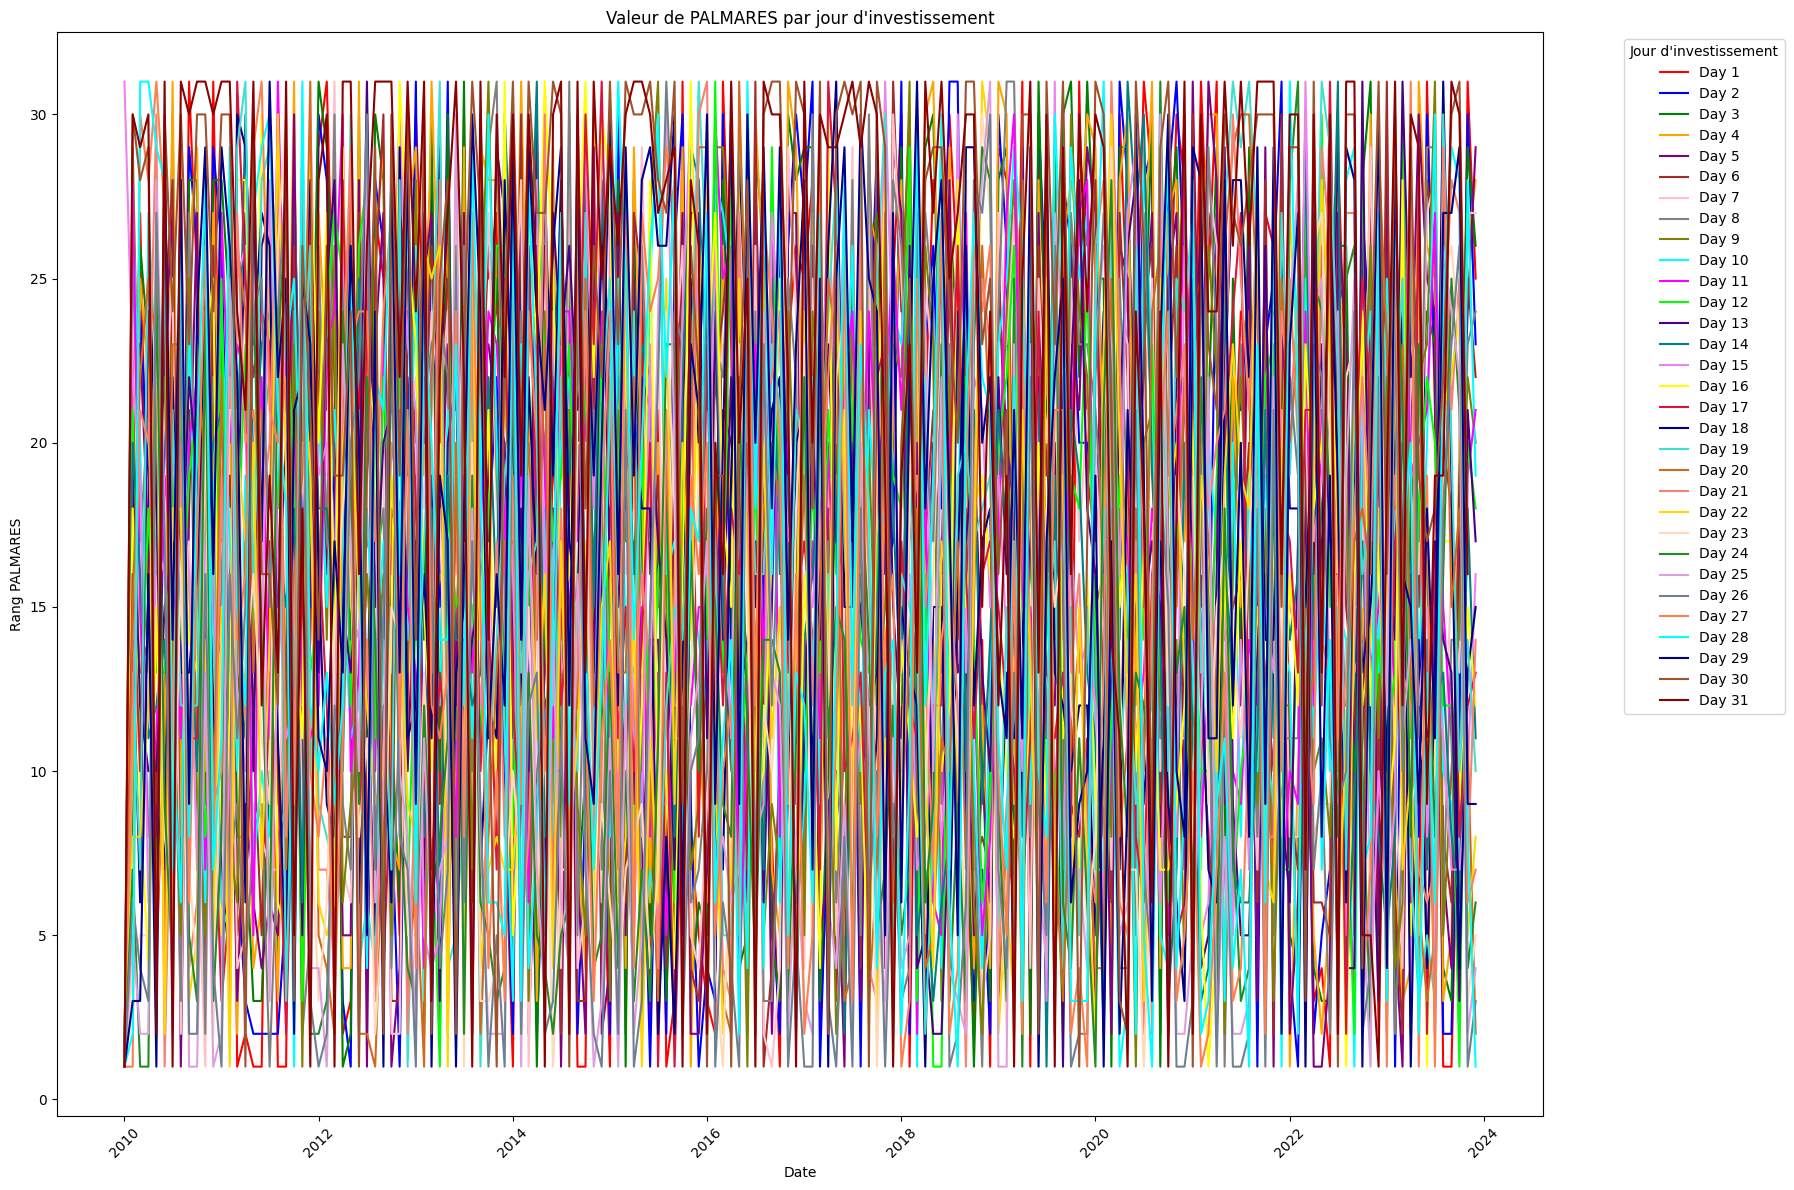

In [9]:
plt.figure(figsize=(18, 12))

# Boucle pour tracer chaque jour d'investissement avec une couleur fixe
for investing_day in investing_days:
    # Filtrer les données pour le jour d'investissement actuel
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]  # Couleur fixe pour chaque jour
    plt.plot(day_data['MONTH'], day_data['PALMARES'], label=f'Day {investing_day}', color = colors[investing_day] )

# Ajouter des détails pour le graphique
plt.title('Valeur de PALMARES par jour d\'investissement')
plt.xlabel('Date')
plt.ylabel('Rang PALMARES')
plt.legend(title='Jour d\'investissement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


In [10]:
day_data

FIRST_OPEN_DATE TICKER         OPEN   BASE_OPEN  CHOSEN_DAY      MONTH  \
0        2011-01-03  ^GSPC  1257.619995  112.633439          31 2010-01-01   
1        2010-03-01  ^GSPC  1105.359985  102.930465          31 2010-02-01   
2        2010-03-31  ^GSPC  1171.750000  106.006189          31 2010-03-01   
3        2010-05-03  ^GSPC  1188.579956  101.481347          31 2010-04-01   
4        2011-05-02  ^GSPC  1365.209961  114.860591          31 2010-05-01   
..              ...    ...          ...         ...         ...        ...   
162      2023-07-31  ^GSPC  4584.819824  103.018547          31 2023-07-01   
163      2023-08-31  ^GSPC  4517.009766   98.649867          31 2023-08-01   
164      2023-10-02  ^GSPC  4284.520020   94.568488          31 2023-09-01   
165      2023-10-31  ^GSPC  4171.330078   97.358165          31 2023-10-01   
166      2023-12-01  ^GSPC  4559.430176  108.525045          31 2023-11-01   

     INVESTED_THIS_DAY  TOTAL_INVESTED  SHARES_BOUGHT_THIS_DAY  HELD_SHARES  \
0                10000           10000                7.951528     7.951528   
1                10000           20000                9.046826    16.998354   
2                10000           30000                8.534244    25.532598   
3                10000           40000                8.413401    33.945999   
4                10000           50000                7.324881    41.270879   
..                 ...             ...                     ...          ...   
162              10000         1630000                2.181111   768.798051   
163              10000         1640000                2.213854   771.011905   
164              10000         1650000                2.333984   773.345889   
165              10000         1660000                2.397317   775.743205   
166              10000         1670000                2.193257   777.936462   

      TOTAL_VALUE      PERF  DAY_OCCURRENCE  AVG_PERF  PALMARES  
0    1.000000e+04  0.000000               1  0.000000       1.0  
1    1.878930e+04 -0.060535               2 -0.030267      30.0  
2    2.991782e+04 -0.002739               3 -0.000913      29.0  
3    4.034753e+04  0.008688               4  0.002172      30.0  
4    5.634342e+04  0.126868               5  0.025374       2.0  
..            ...       ...             ...       ...       ...  
162  3.524801e+06  1.162454             163  0.007132      19.0  
163  3.482668e+06  1.123578             164  0.006851      19.0  
164  3.313416e+06  1.008131             165  0.006110      31.0  
165  3.235881e+06  0.949326             166  0.005719      30.0  
166  3.546947e+06  1.123920             167  0.006730      16.0  

[167 rows x 15 columns]

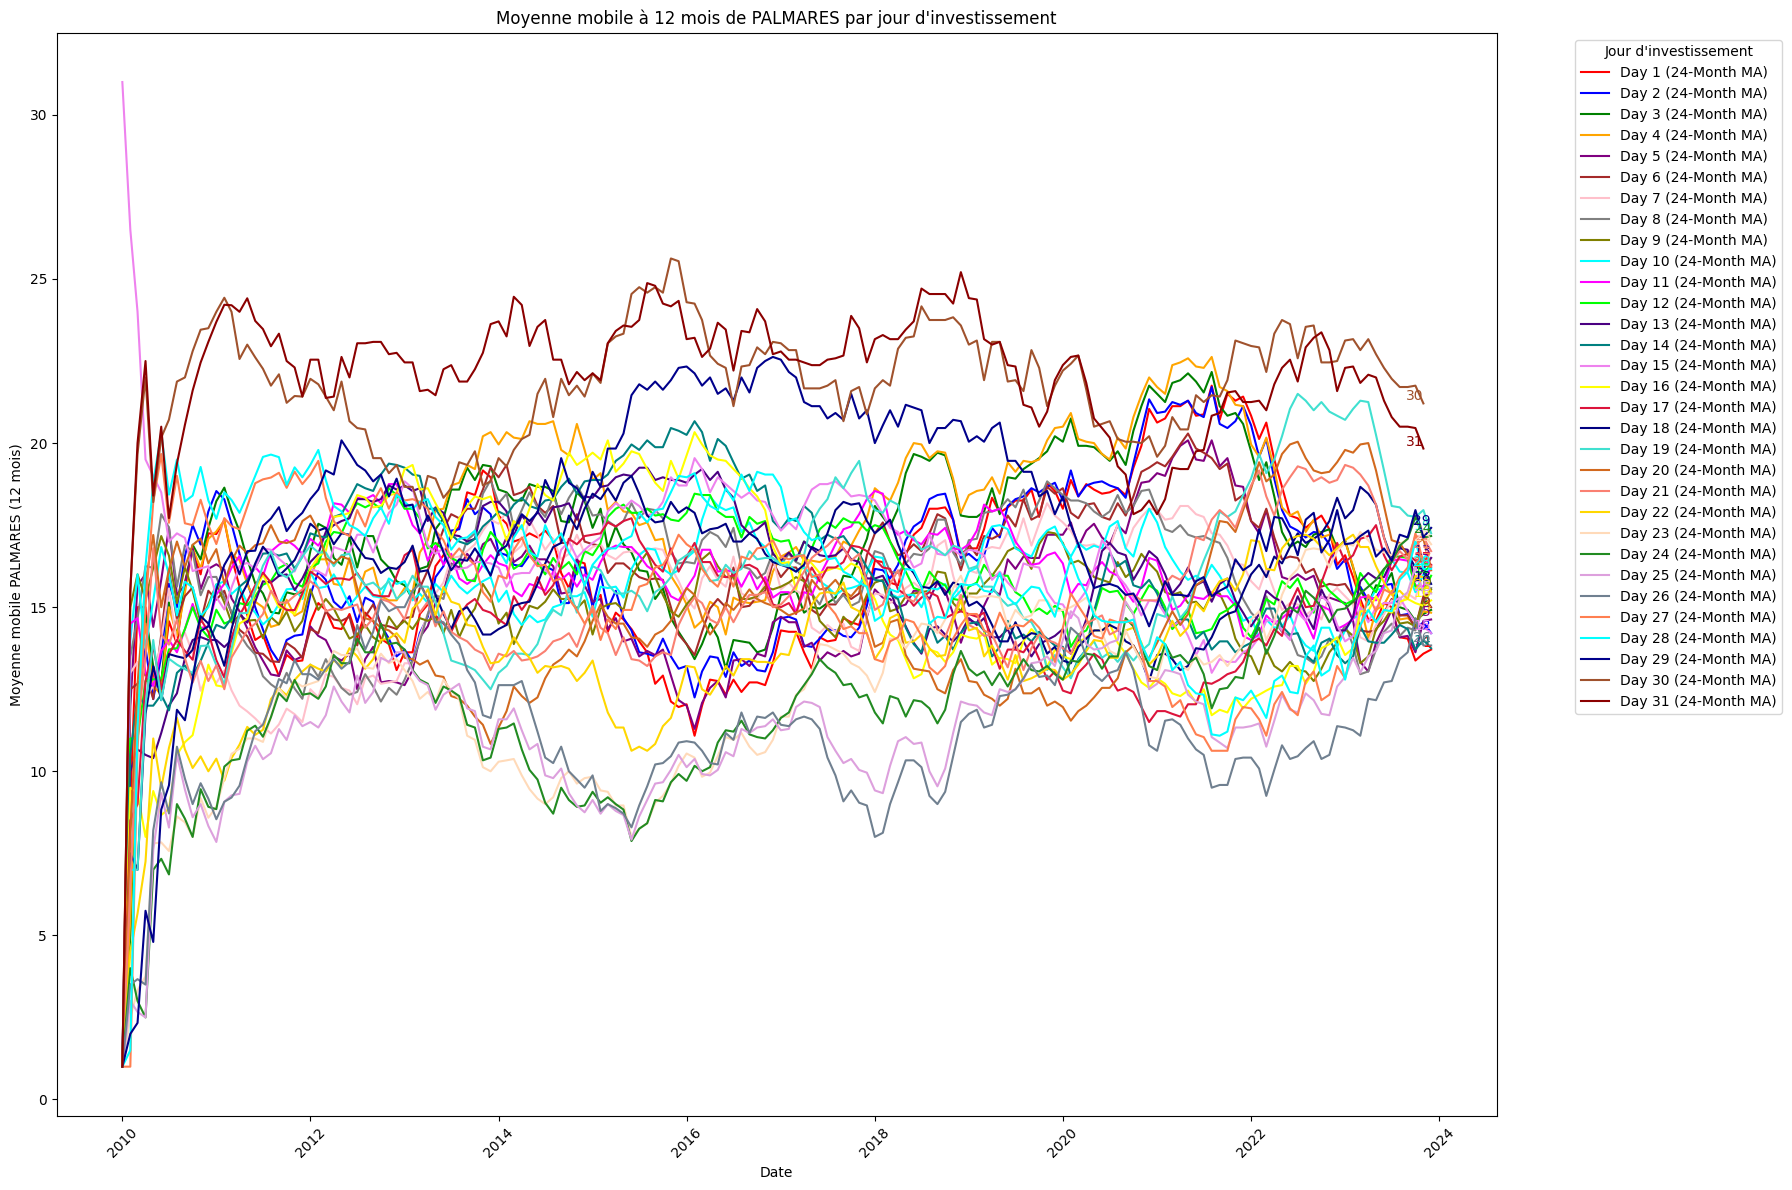

In [11]:
import matplotlib.pyplot as plt

# Calcul de la moyenne mobile sur 24 mois pour chaque jour d'investissement
final_dataset['MA24_PALMARES'] = final_dataset.groupby('CHOSEN_DAY')['PALMARES'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())

plt.figure(figsize=(18, 12))

# Boucle pour tracer la moyenne mobile de chaque jour d'investissement
for investing_day in investing_days:
    # Filtrer les données pour le jour d'investissement actuel
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]  # Couleur fixe pour chaque jour
    
    # Tracer la courbe de la moyenne mobile
    plt.plot(day_data['MONTH'], day_data['MA24_PALMARES'], label=f'Day {investing_day} (24-Month MA)', color=color)

    # Ajouter les labels CHOSEN_DAY à la fin de la courbe
    last_point = day_data.iloc[-1]  # Dernière ligne de données pour le jour d'investissement
    plt.text(last_point['MONTH'], last_point['MA24_PALMARES'], str(last_point['CHOSEN_DAY']), color=color, 
             verticalalignment='bottom', horizontalalignment='right', fontsize=10)

# Ajouter des détails pour le graphique
plt.title('Moyenne mobile à 12 mois de PALMARES par jour d\'investissement')
plt.xlabel('Date')
plt.ylabel('Moyenne mobile PALMARES (12 mois)')
plt.legend(title='Jour d\'investissement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


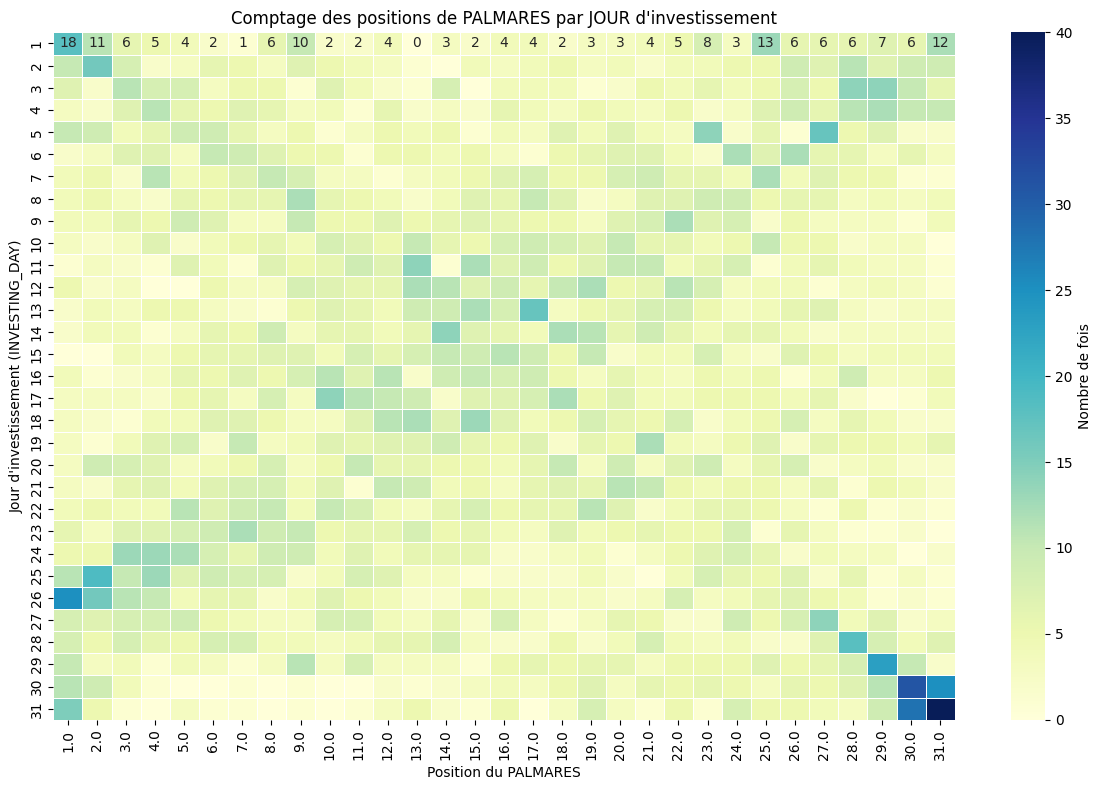

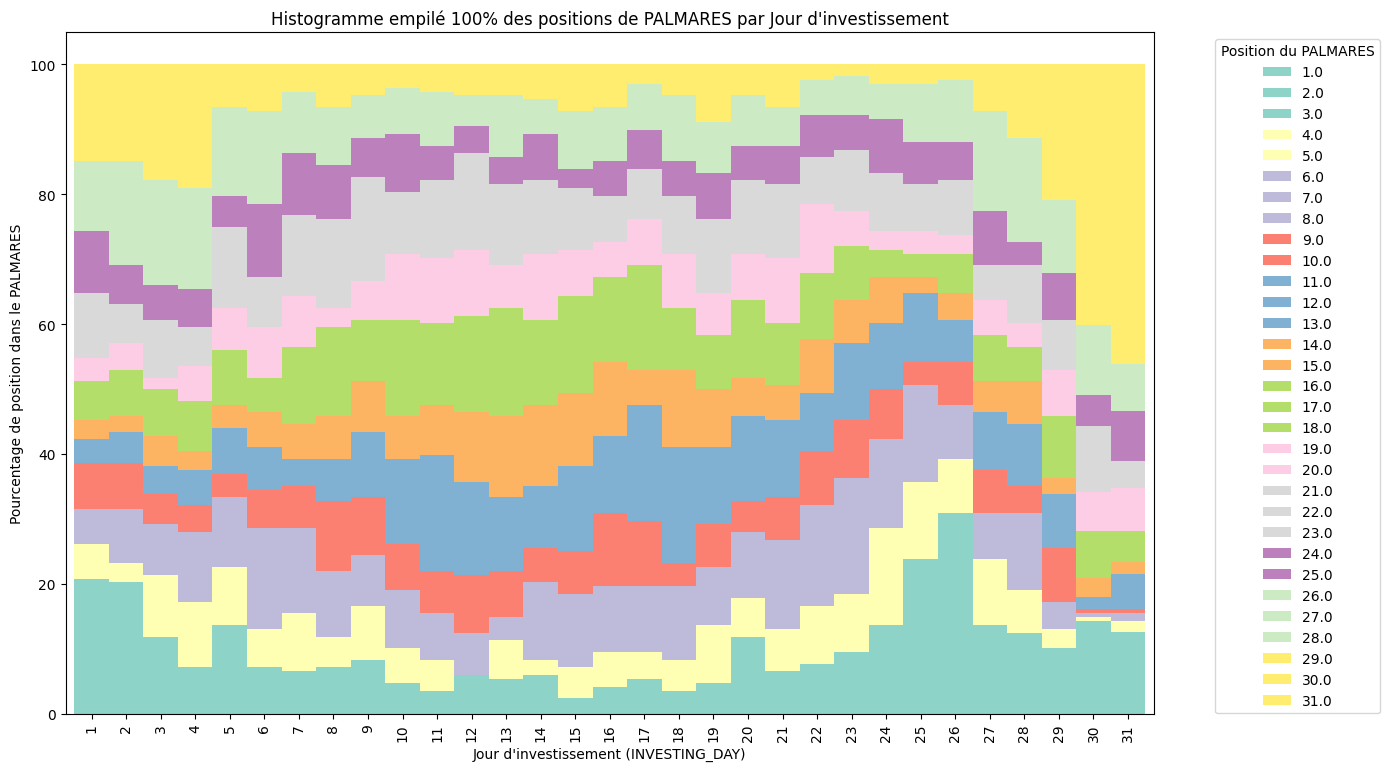

In [12]:
import seaborn as sns

# 1. Comptage du nombre de fois où chaque INVESTING_DAY se trouve à chaque position du PALMARES
position_counts = final_dataset.groupby(['CHOSEN_DAY', 'PALMARES']).size().unstack(fill_value=0)

# 2. Heatmap: Visualiser les comptes
plt.figure(figsize=(12, 8))
sns.heatmap(position_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Nombre de fois'}, linewidths=0.5)
plt.title('Comptage des positions de PALMARES par JOUR d\'investissement')
plt.xlabel('Position du PALMARES')
plt.ylabel('Jour d\'investissement (INVESTING_DAY)')
plt.tight_layout()
plt.show()

# 3. Histogramme empilé (100%): Calculer les pourcentages pour chaque position
# Calculer les pourcentages par ligne (par JOUR d'investissement)
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100

# Tracer l'histogramme empilé
position_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3', width=1, edgecolor='none')

plt.title('Histogramme empilé 100% des positions de PALMARES par Jour d\'investissement')
plt.xlabel('Jour d\'investissement (INVESTING_DAY)')
plt.ylabel('Pourcentage de position dans le PALMARES')
plt.legend(title='Position du PALMARES', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


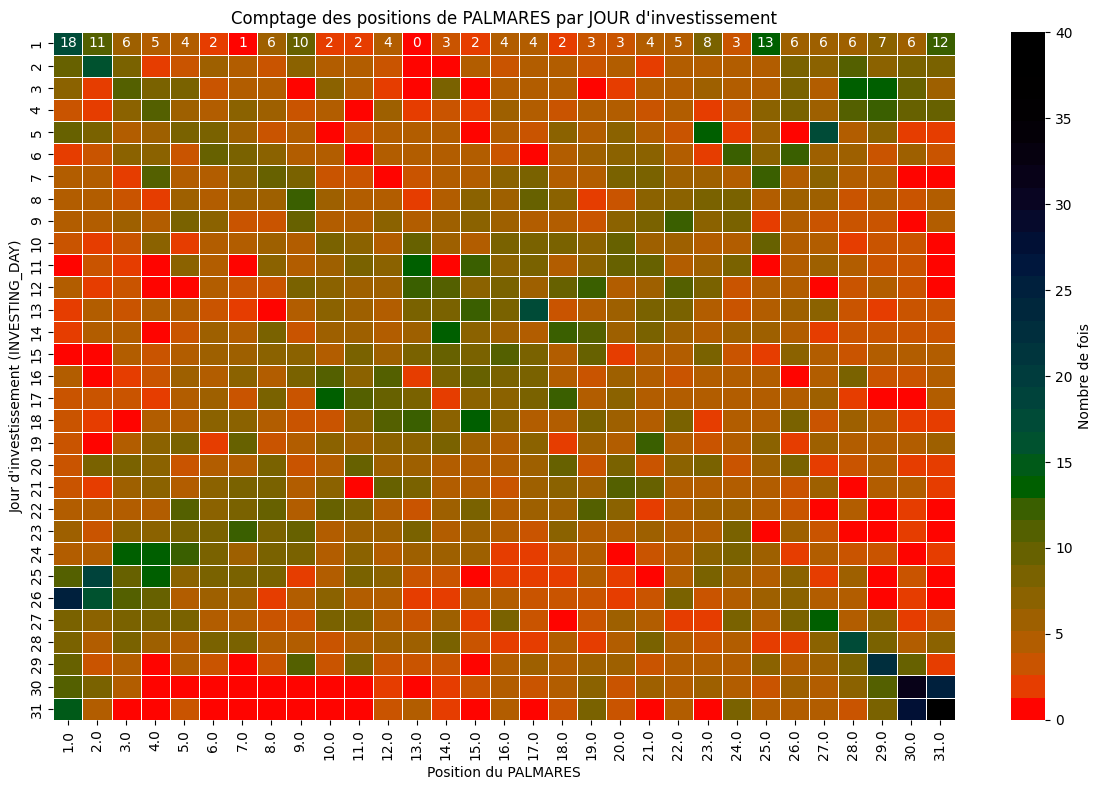

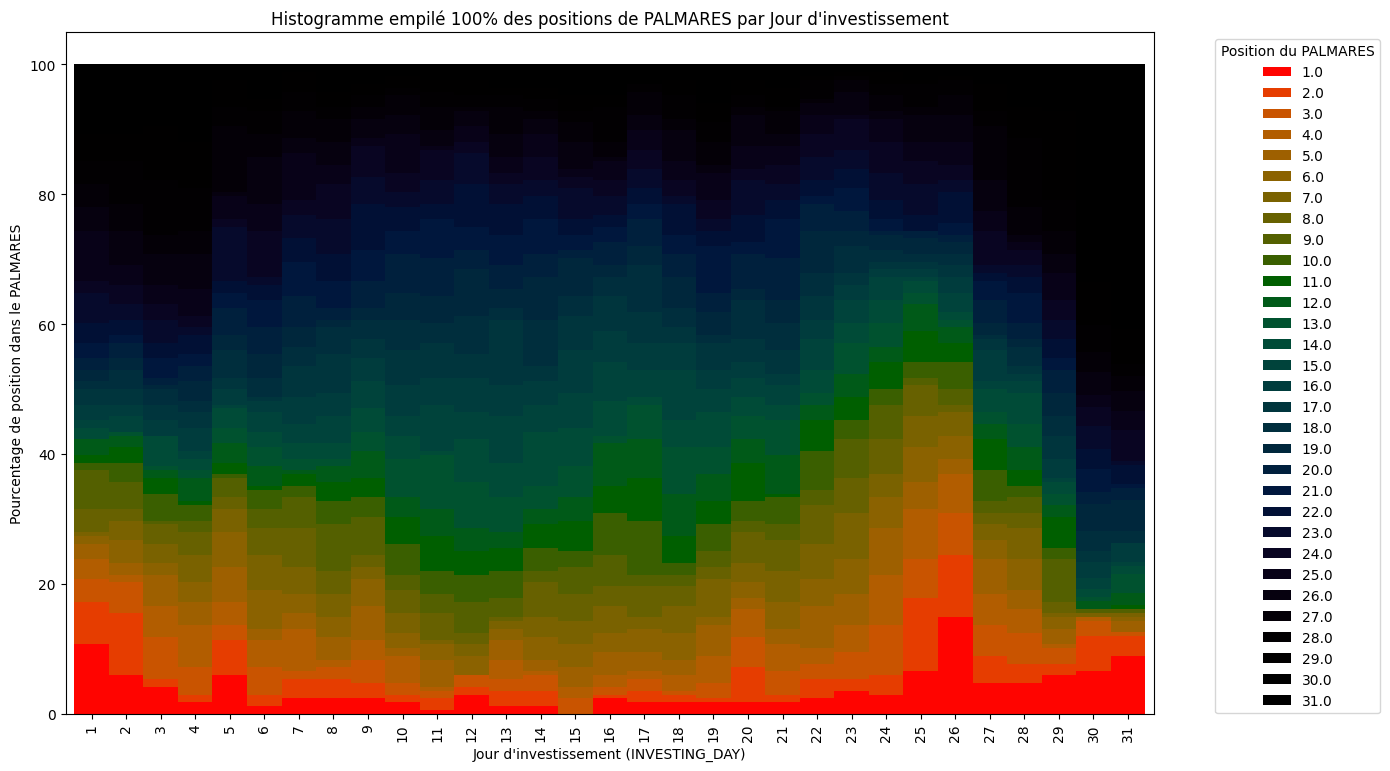

In [13]:
import seaborn as sns
custom_colors = [
    '#ff0400', '#e63d00', '#c95400', '#b25d00', '#9e6000', '#8b6200', '#7a6200', '#676100', '#546000', 
    '#3a5f00', '#005f00', '#005a18', '#00522f', '#004b37', '#00433b', '#003c3d', '#00353d', '#002e3d', 
    '#00273c', '#00203d', '#00173d', '#011035', '#060a2c', '#090522', '#080218', '#06010f', '#040007', 
    '#020002', '#010000', '#000000', '#000000'
]


# 1. Comptage du nombre de fois où chaque INVESTING_DAY se trouve à chaque position du PALMARES
position_counts = final_dataset.groupby(['CHOSEN_DAY', 'PALMARES']).size().unstack(fill_value=0)

# 2. Heatmap: Visualiser les comptes avec les couleurs personnalisées
plt.figure(figsize=(12, 8))
sns.heatmap(position_counts, annot=True, fmt="d", cmap=sns.color_palette(custom_colors), cbar_kws={'label': 'Nombre de fois'}, linewidths=0.5)
plt.title('Comptage des positions de PALMARES par JOUR d\'investissement')
plt.xlabel('Position du PALMARES')
plt.ylabel('Jour d\'investissement (INVESTING_DAY)')
plt.tight_layout()
plt.show()

# 3. Histogramme empilé (100%): Calculer les pourcentages pour chaque position
# Calculer les pourcentages par ligne (par JOUR d'investissement)
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100

# Tracer l'histogramme empilé avec les couleurs personnalisées
position_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=custom_colors[:31], width=1, edgecolor='none')

plt.title('Histogramme empilé 100% des positions de PALMARES par Jour d\'investissement')
plt.xlabel('Jour d\'investissement (INVESTING_DAY)')
plt.ylabel('Pourcentage de position dans le PALMARES')
plt.legend(title='Position du PALMARES', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
